# **Hash Table이란?**

Key_Value로 데이터를 저장하는 자료구조 중 하나로 빠르게 데이터를 검색할 수 있는 자료구조이다. 

Hash table이 빠른 검색을 제공하는 이유는 내부적으로 배열을 사용하여 데이터를 저장 하기 때문

Hashtable은 각각의 key값에 해시함수를 적용해 배열의 고유한 index를 생성하고, 이 index를 활용해 값을 저장하거나 검색하게된다. 여기서 실제 값이 저장되는 장소를 버킷 or 슬롯이라고 한다.

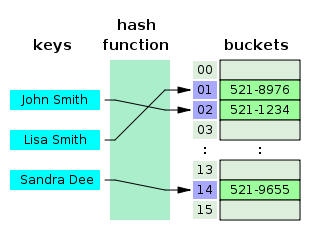

ex. key_value 구조를 가지는 데이터 john smith_521-1234를 크기가 16인 해시테이블에 저장한다고 하면, 
```
index = hash_function("john smith") % 16
```
연산을 통해 index값을 계산 한 후 
```
array[index] = "521-1234"
```
로 value를 저장하게 된다. 이러한 구조로 데이터를 저장하면 key값으로 데이터를 찾을 때 해시함수를 1번만 수행하면 되므로 매우 빠르게 데이터를 저장 /삭제 /조회 할 수있다.

시간 복잡도 = O(1)


# **Hash값이 출동하는 경우**

john smith를 해시 함수를 돌려 나온값과 sandra dee를 해시 함수를 돌려 나온값이 동일하다면 아래의 해결방법을 진행하며 해결할 수있다.

방법 1: Separate Chaining(분리연결)

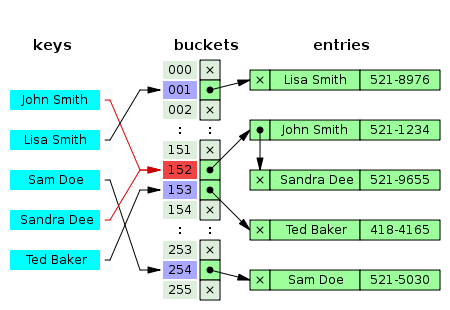

동일한 버킷의 데이터에 대해 자료구조를 활용해 추가 메모리를 사용하여 다음 데이터의 주소를 저장하는 방법이다. 동일한 해시 값을 가지면, 동일한 버킷안에 엔트리를 할당해 줘야 한다. 버킷내 엔트리 값들은 linked list형태로 이어준다.

 이러한 Chaining방식은 해시 테이블의 확장이 필요없고 간단하게 구현이 가능하며, 손쉽게 삭제할 수 있다는 장점이 있다.

 하지만 데이터의 수가 많아지면 동일한 버킷에 chaining되는 데이터가 많아지며 그에 다라 캐시의 효율성이 감소한다는 단점이 있다.

**방법 2: Open addressing(개방주소소)**

Open addressing이란 추가적인 메모리를 사용하는 chaining과 다르게 비어있는 해시 테이블의 공간을 활용하는 방법. Open addressing을 구현하기 위한 방법은 대표적으로 3가지정도가 있다.

* Linear Probing: 현재의 버킷 index로부터 고정폭 만큼씩 이동하여 차례대로 검색해 비어있는 버킷에 데이터를 저장

* Quadratic Probing: 해시의 저장순서 폭을 제곱으로 정하는 방식  [ex. 처음 충돌이 발생 - 1만큼 이동 그다음 계속 충돌이 발생하면 4(2^2), 9(3^2)칸씩 옮기는 방법]

* Double Hashing Probing: 해시된 값을 한번 더 해싱하여 해시의 규칙성을 없애버리는 방식. 해시된 값을 한번더 해싱하여 새로운 주소를 할당하기 때문에 다른방법들보다 많은 연산이 필요함함

충돌을 방지하는 방법들을 데이터의 규칙성(클러스터링)을 방지하기 위한 방식이지만 공간을 많이 사용한다는 치명적 단점이 있다. 만약 테이블이 꽉차있는 경우라면 테이블을 확장해주어야 하는데, 이는 성능의 저하를 불러오기 때문에 가급적이면 확장을 하지 않도록 테이블을 설계해 주어야 한다.

(통계적으로 해시테이블 공간 사용률이 70%~80%정도가 되면 해시의 충돌이 빈번하게 발생하여 성능이 저하되기 시작한다고 함)

해시테이블에서 자주 사용하게 되는 데이터를 cache에 적용하면 효율을 높일수 있음. 자주 hit하게 되는 데이터를 캐시에서 바로 찾음으로써 해시테이블의 성능을 향상 시킬 수 있음음

시간복잡도

삽입/삭제/탐색에 충돌x = O(1)
삽입/삭제/탐색에 충돌 = O(N)- 최악

왜냐하면 해시 충돌로 인해 하나의 버킷에 여러 엔트리가 연결되어 있는 경우에 모든 엔트리를 탐색해야 할 수 있기 때문이다.